### `Problem Statement` : 
**The aim here will be to predict the medical costs billed by health insurance on an individual given some features about the individual in the dataset.**

### `Objective :`
**Develop a machine learning model to predict medical costs billed by health insurance based on individual attributes. The model aims to enhance cost estimation accuracy, providing valuable insights for both individuals and health insurance providers.**

In [223]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [224]:
dataset = pd.read_csv(R"C:\Users\Arpan Ghosh\OneDrive\Desktop\ML\ml_project\insurance.csv")

In [225]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [226]:
dataset.shape

(1338, 7)

In [227]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [228]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [229]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [230]:
dataset.columns.str.strip()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [231]:
object_col = dataset.select_dtypes(include = "object")
object_col

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [232]:
numeric_col = dataset[dataset.select_dtypes(include = ["int","float"]).columns]
numeric_col.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [233]:
def obj__univariate_analysis(data):
    for col_name in data:
        print("*"*10, col_name,"*"*10)
        print(data[col_name].agg(["count","nunique","unique"]))
        print("value_counts: \n",data[col_name].value_counts())

In [234]:
obj__univariate_analysis(object_col)

********** sex **********
count                1338
nunique                 2
unique     [female, male]
Name: sex, dtype: object
value_counts: 
 male      676
female    662
Name: sex, dtype: int64
********** smoker **********
count           1338
nunique            2
unique     [yes, no]
Name: smoker, dtype: object
value_counts: 
 no     1064
yes     274
Name: smoker, dtype: int64
********** region **********
count                                              1338
nunique                                               4
unique     [southwest, southeast, northwest, northeast]
Name: region, dtype: object
value_counts: 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [235]:
def num_univariate_analysis(data):
    for col_name in data:
        print("*"*10, col_name, "*"*10)
        print(data[col_name].agg(["mean","max","min","std"]))
        print()

In [236]:
num_univariate_analysis(numeric_col)

********** age **********
mean    39.207025
max     64.000000
min     18.000000
std     14.049960
Name: age, dtype: float64

********** bmi **********
mean    30.663397
max     53.130000
min     15.960000
std      6.098187
Name: bmi, dtype: float64

********** children **********
mean    1.094918
max     5.000000
min     0.000000
std     1.205493
Name: children, dtype: float64

********** charges **********
mean    13270.422265
max     63770.428010
min      1121.873900
std     12110.011237
Name: charges, dtype: float64



### Conclusion : `This is Supervised learning - Regression Task since target variable is continuous`

## `Handling Missing values`

In [237]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [238]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Observations : `In this case we  have not any missing values`

## `Handling Duplicate values`

In [239]:
dataset.duplicated().sum()

1

In [240]:
dataset[dataset.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [241]:
duplicates = dataset[dataset.duplicated(keep=False)]

print(duplicates)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [242]:
dataset = dataset.drop_duplicates()

In [243]:
dataset.shape

(1337, 7)

#### Observations : `In this case we can see in datast have 1 duplicate value, so we can drop the duplicate value.`

## `Handling Outliers`

<Axes: >

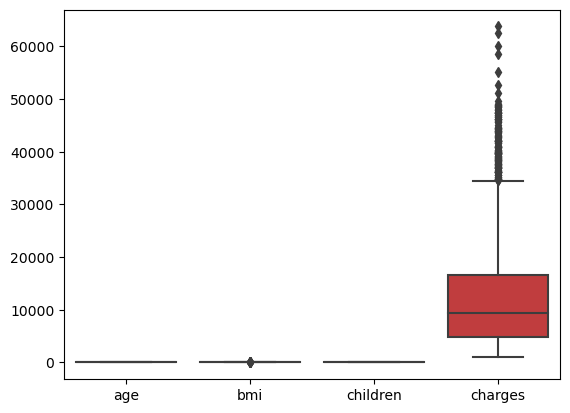

In [244]:
sns.boxplot(dataset)

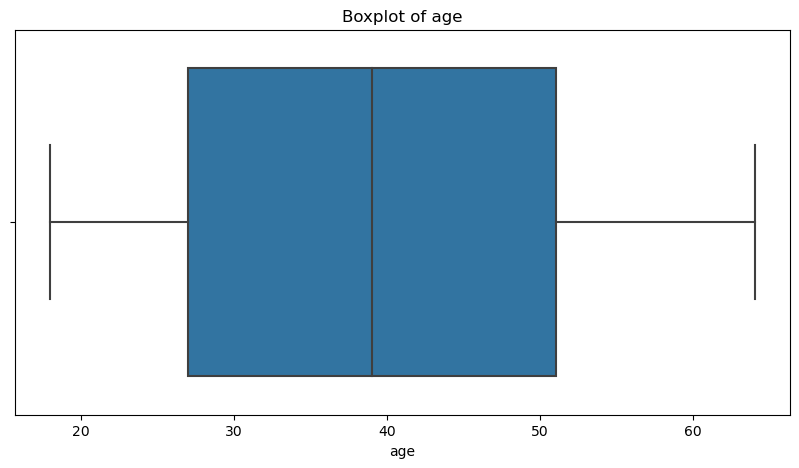

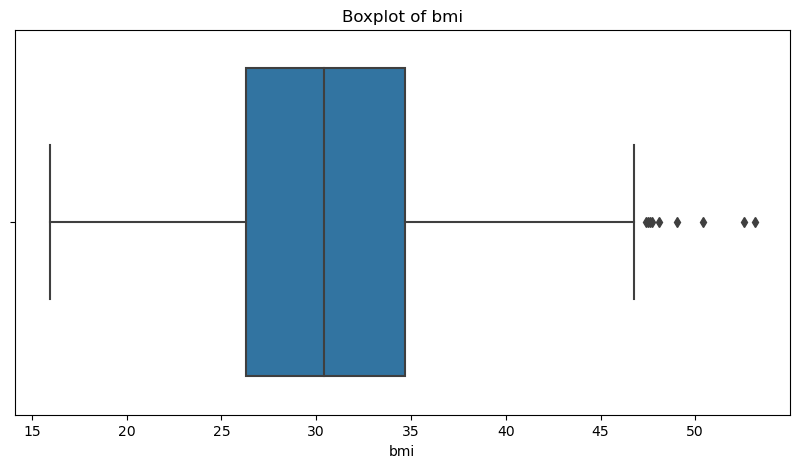

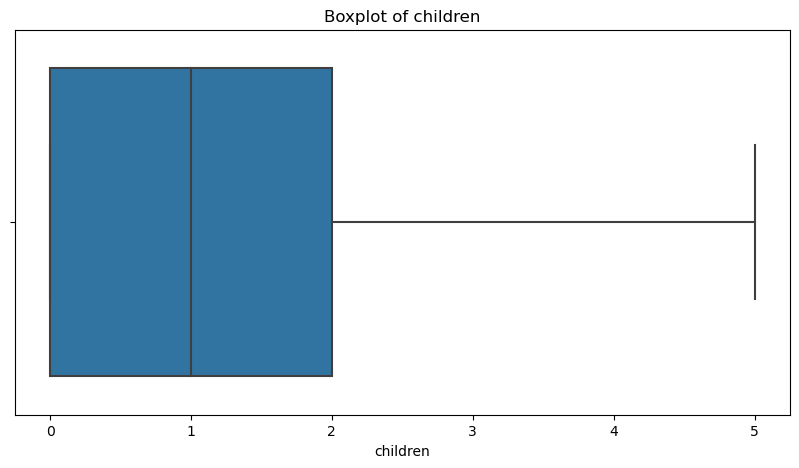

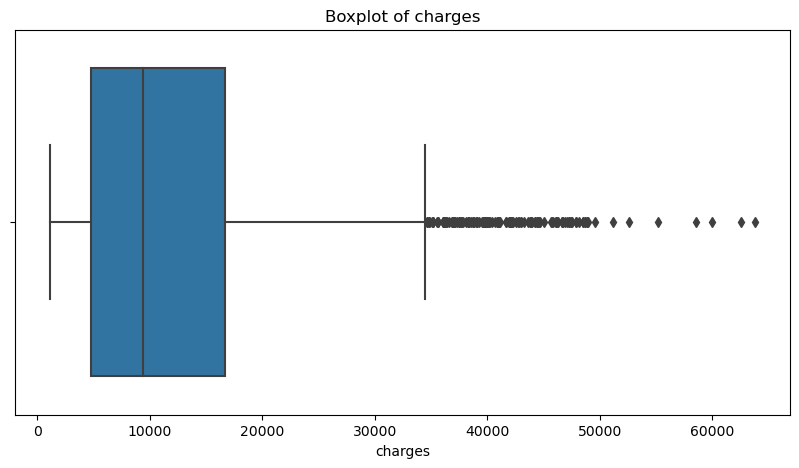

In [245]:
for col in numeric_col:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#### Observations : `Here We can see outliers in "bmi" column and "Charges" columns`

### `Finding outliers on bmi`

In [246]:
dataset["bmi"].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [247]:
Q_1 = dataset["bmi"].quantile(0.25)
Q_3 = dataset["bmi"].quantile(0.75)
print("Q_1 = ",Q_1, "Q_3 = ",Q_3)

Q_1 =  26.29 Q_3 =  34.7


In [248]:
IQR = Q_3 -Q_1
print("IQR = ",IQR)

IQR =  8.410000000000004


In [249]:
lower_boundary = Q_1 - (IQR * 1.5)
upper_boundary = Q_3 + (IQR * 1.5)
print("lower_boundary = ", lower_boundary)
print("upper_boundary = ", upper_boundary)

lower_boundary =  13.674999999999994
upper_boundary =  47.31500000000001


In [250]:
# Findding outliers in lower boundary

lower_outliers = dataset[dataset["bmi"]<lower_boundary ]
lower_outliers

,age,sex,bmi,children,smoker,region,charges


In [251]:
# Findding outliers in upper boundary

upper_outliers = dataset[dataset["bmi"] > upper_boundary ]
upper_outliers

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [252]:
print(lower_outliers.shape)
print(upper_outliers.shape)

(0, 7)
(9, 7)


### `Finding outliers on charges`

In [253]:
Q_1 = dataset["charges"].quantile(0.25)
Q_3 = dataset["charges"].quantile(0.75)
print("Q_1 = ",Q_1, "Q_3 = ",Q_3)

Q_1 =  4746.344 Q_3 =  16657.71745


In [254]:
IQR = Q_3 -Q_1
print("IQR = ",IQR)

IQR =  11911.37345


In [255]:
lower_boundary = Q_1 - (IQR * 1.5)
upper_boundary = Q_3 + (IQR * 1.5)
print("lower_boundary = ", lower_boundary)
print("upper_boundary = ", upper_boundary)

lower_boundary =  -13120.716174999998
upper_boundary =  34524.777625


In [256]:
# Findding outliers in lower boundary

lower_outliers = dataset[dataset["charges"]<lower_boundary ]
lower_outliers

,age,sex,bmi,children,smoker,region,charges


In [257]:
# Findding outliers in upper boundary

upper_outliers = dataset[dataset["charges"] > upper_boundary ]
upper_outliers

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


#### Conclusion : `Since outliers are greater in number we cannot drop or modify outliers`

## `Removing Unwanted columns`
## `EDA on continuous variables`

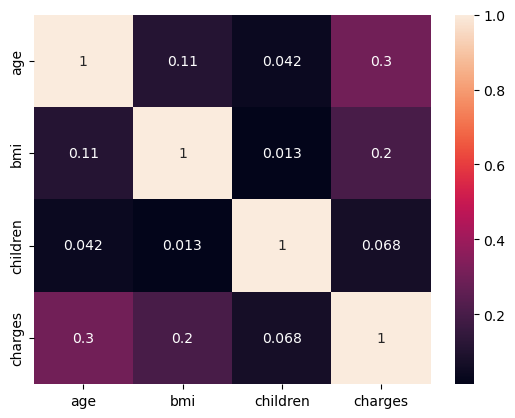

In [258]:
sns.heatmap(numeric_col.corr(), annot = True)
plt.show()

#### Conclusion : ` Here we can see Age and charges are having positive correlation`

## `EDA on categorical and continuous variables`

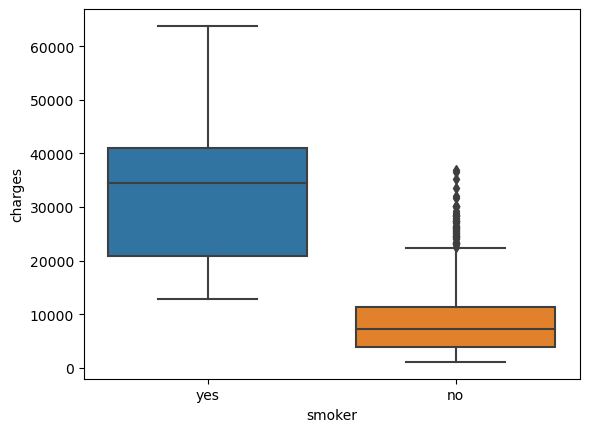

In [259]:
sns.boxplot(x=dataset['smoker'],y=dataset['charges'])
plt.show()

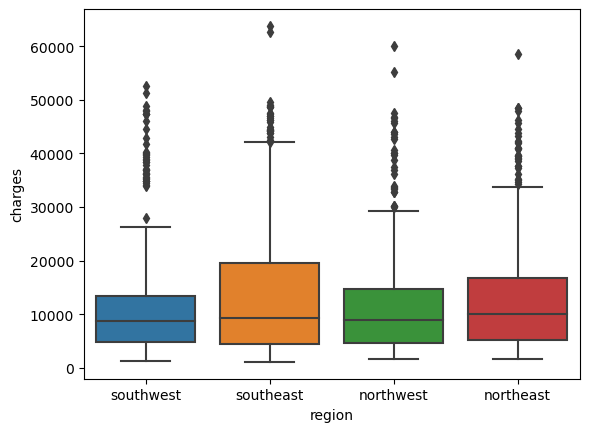

In [260]:
sns.boxplot(x=dataset['region'],y=dataset['charges'])
plt.show()

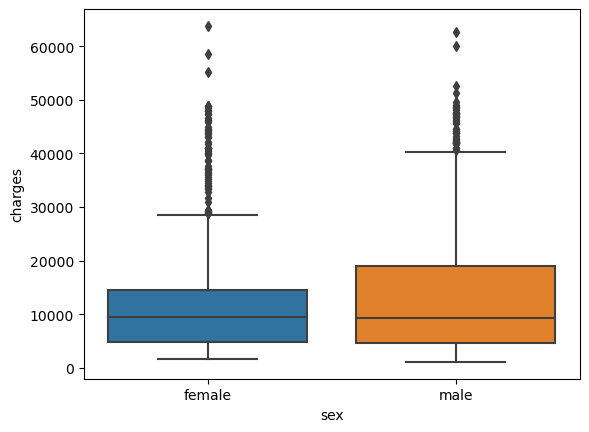

In [261]:
sns.boxplot(x=dataset['sex'],y=dataset['charges'])
plt.show()

#### Observation : ` Here No need to drop any columns since we can see relationship between columns`

## Encoding categorical text data

### `coverting categorical text data to a numerical form`
#### Conclusion : `The categorical columns are in Nominal data, hence we use One-hot Encoding`

In [262]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [263]:
def num_univariate_analysis(data):
    for col_name in data:
        print("*"*10, col_name, "*"*10)
        print(data[col_name].agg(["value_counts"]))
        print()

In [264]:
num_univariate_analysis(object_col)

********** sex **********
        value_counts
male             676
female           662

********** smoker **********
     value_counts
no           1064
yes           274

********** region **********
           value_counts
southeast           364
southwest           325
northwest           325
northeast           324



#### `try to handle sex and smoker & region in numerical data`

In [265]:
# By using sklear(scikit learn)

from sklearn.compose import ColumnTransformer 

In [266]:
from sklearn.preprocessing import OneHotEncoder

In [267]:
# object of OneHotEncoder

oh = OneHotEncoder()

In [268]:
ct = ColumnTransformer(transformers =  [("ohe",oh,["sex","smoker","region"] )], remainder = "passthrough")

In [269]:
dataset = ct.fit_transform(dataset)
dataset

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.79000000e+01, 0.00000000e+00, 1.68849240e+04],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.37700000e+01, 1.00000000e+00, 1.72555230e+03],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.30000000e+01, 3.00000000e+00, 4.44946200e+03],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.68500000e+01, 0.00000000e+00, 1.62983350e+03],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.58000000e+01, 0.00000000e+00, 2.00794500e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.90700000e+01, 0.00000000e+00, 2.91413603e+04]])

In [270]:
ct.get_feature_names_out()

array(['ohe__sex_female', 'ohe__sex_male', 'ohe__smoker_no',
       'ohe__smoker_yes', 'ohe__region_northeast',
       'ohe__region_northwest', 'ohe__region_southeast',
       'ohe__region_southwest', 'remainder__age', 'remainder__bmi',
       'remainder__children', 'remainder__charges'], dtype=object)

In [271]:
col_name = [each_col.split("__")[1] for each_col in ct.get_feature_names_out()]

In [272]:
dataset = pd.DataFrame(dataset, columns = col_name)

In [273]:
dataset

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0,10600.54830
1333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.0,31.920,0.0,2205.98080
1334,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0,1629.83350
1335,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0,2007.94500


In [274]:
dataset.dtypes

sex_female          float64
sex_male            float64
smoker_no           float64
smoker_yes          float64
region_northeast    float64
region_northwest    float64
region_southeast    float64
region_southwest    float64
age                 float64
bmi                 float64
children            float64
charges             float64
dtype: object

## `Split independent and dependent Variable`

In [275]:
# Independent Variable / input

X = dataset.drop("charges", axis = 1)
X

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1332,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0
1333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.0,31.920,0.0
1334,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0


In [277]:
# Dependent Variable / Target

y = dataset["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1332    10600.54830
1333     2205.98080
1334     1629.83350
1335     2007.94500
1336    29141.36030
Name: charges, Length: 1337, dtype: float64

### `Split data into test and train`

In [278]:
from sklearn.model_selection import train_test_split

In [279]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2475)

In [280]:
X_train

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
1170,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,43.0,26.700,2.0
403,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,49.0,32.300,3.0
635,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,19.0,24.510,1.0
463,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,56.0,25.935,0.0
278,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,59.0,31.790,2.0
...,...,...,...,...,...,...,...,...,...,...,...
534,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,64.0,40.480,0.0
370,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,61.0,21.090,0.0
149,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,19.0,28.400,1.0
619,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,30.0,31.400,1.0


In [281]:
X_test.shape

(331, 11)

In [282]:
y_train

1170    22478.60000
403     10269.46000
635      2709.11190
463     11165.41765
278     12928.79110
           ...     
534     13831.11520
370     13415.03810
149      1842.51900
619      3659.34600
561     10923.93320
Name: charges, Length: 1006, dtype: float64

### `Feature scalling`

In [283]:
from sklearn.preprocessing import StandardScaler

In [284]:
sc = StandardScaler()

In [285]:
X_train = sc.fit_transform(X_train)

In [286]:
X_train

array([[ 1.00798416, -1.00798416, -1.91809014, ...,  0.27407391,
        -0.68645718,  0.76325822],
       [-0.99207908,  0.99207908,  0.52135193, ...,  0.70376484,
         0.2365457 ,  1.6051856 ],
       [ 1.00798416, -1.00798416,  0.52135193, ..., -1.44468983,
        -1.04741724, -0.07866916],
       ...,
       [-0.99207908,  0.99207908,  0.52135193, ..., -1.44468983,
        -0.40625988, -0.07866916],
       [-0.99207908,  0.99207908,  0.52135193, ..., -0.65692312,
         0.08820595, -0.07866916],
       [ 1.00798416, -1.00798416,  0.52135193, ...,  1.06184062,
         0.29917804, -0.92059654]])

In [287]:
X_test = sc.transform(X_test)
X_test

array([[-0.99207908,  0.99207908,  0.52135193, ...,  1.41991639,
        -0.8908364 , -0.07866916],
       [ 1.00798416, -1.00798416,  0.52135193, ..., -1.22984436,
        -0.33703466, -0.92059654],
       [ 1.00798416, -1.00798416,  0.52135193, ...,  1.49153155,
        -2.06519275, -0.92059654],
       ...,
       [ 1.00798416, -1.00798416,  0.52135193, ..., -1.44468983,
         1.08208228, -0.92059654],
       [ 1.00798416, -1.00798416,  0.52135193, ...,  1.70637702,
         0.71452934, -0.07866916],
       [-0.99207908,  0.99207908, -1.91809014, ...,  0.34568906,
        -0.10958038,  0.76325822]])

### `Building ML Model`

In [289]:
from sklearn.linear_model import LinearRegression

In [290]:
lr = LinearRegression()

### `Training The Mode`

In [291]:
lr.fit(X_train, y_train)

LinearRegression()

### `prediction / Test`

In [292]:
X_test

array([[-0.99207908,  0.99207908,  0.52135193, ...,  1.41991639,
        -0.8908364 , -0.07866916],
       [ 1.00798416, -1.00798416,  0.52135193, ..., -1.22984436,
        -0.33703466, -0.92059654],
       [ 1.00798416, -1.00798416,  0.52135193, ...,  1.49153155,
        -2.06519275, -0.92059654],
       ...,
       [ 1.00798416, -1.00798416,  0.52135193, ..., -1.44468983,
         1.08208228, -0.92059654],
       [ 1.00798416, -1.00798416,  0.52135193, ...,  1.70637702,
         0.71452934, -0.07866916],
       [-0.99207908,  0.99207908, -1.91809014, ...,  0.34568906,
        -0.10958038,  0.76325822]])

In [293]:
y_pred = lr.predict(X_test)

In [297]:
y_pred

array([ 1.22496914e+04,  2.20169138e+03,  9.56169138e+03,  1.39776914e+04,
        2.51136914e+04,  7.96169138e+03,  4.09691383e+02,  1.12896914e+04,
        2.52169138e+03,  2.74816914e+04,  9.88169138e+03,  1.39776914e+04,
        4.24969138e+03,  1.29536914e+04,  1.03936914e+04,  7.44969138e+03,
        3.35369138e+03,  1.10336914e+04,  1.09056914e+04,  1.14176914e+04,
        8.28169138e+03,  5.14569138e+03,  9.85691383e+02,  1.43369138e+03,
        5.97769138e+03,  8.53769138e+03,  1.68969138e+03,  3.59296914e+04,
        1.19296914e+04, -2.02230862e+03,  1.13536914e+04,  3.06816914e+04,
       -1.57430862e+03,  1.13536914e+04,  8.92169138e+03,  8.47369138e+03,
        7.06569138e+03,  1.41696914e+04,  1.10336914e+04,  2.71616914e+04,
        5.27369138e+03,  3.61216914e+04,  1.58976914e+04,  7.83369138e+03,
       -4.86308617e+02,  2.92736914e+04,  1.10976914e+04,  1.58976914e+04,
        7.93691383e+02,  1.02016914e+04,  9.30569138e+03,  1.03936914e+04,
        9.68969138e+03,  

### `Evalution`

In [294]:
from sklearn.metrics import mean_absolute_error

In [296]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 4182.967661647069


In [299]:
output_df = pd.DataFrame({'Actual': y_test})

In [300]:
output_df['Linear Regression Predictions'] = y_pred

In [301]:
output_df

,Actual,Linear Regression Predictions
580,12913.99240,12249.691383
293,2156.75180,2201.691383
1073,13204.28565,9561.691383
208,13880.94900,13977.691383
157,15518.18025,25113.691383
...,...,...
637,20149.32290,31129.691383
704,5375.03800,7705.691383
391,2138.07070,5145.691383
961,14474.67500,16025.691383


#### Conclusion:
`We trained several regression models on the training data and evaluated their performance on the test set using the Mean Absolute Error (MAE) metric. The models included Linear Regression`

### `Display a plot which shows all the algorithms applied along with the scores achieved`

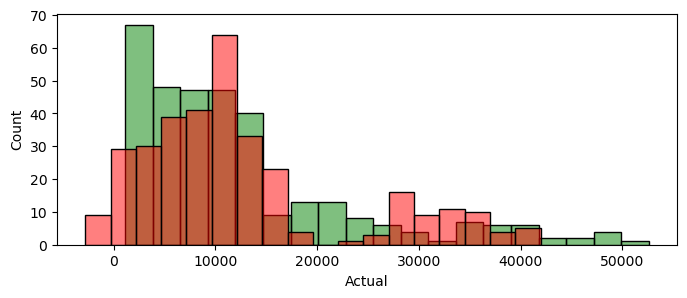

In [305]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='green', alpha=0.5, label="actual")
sns.histplot(output_df['Linear Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.show()

## `Conclusion:`
#### In conclusion, the predictive model developed in this project, particularly the (Best Performing Model), offers a valuable tool for estimating medical costs. This information can empower individuals and insurance providers to make informed decisions and allocate resources efficiently.

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# *********************************** `END`*************************************************